# Computational Geometry in Python

**Computational Geometry** is a field of mathematics that seeks the development of efficient algorithms to solve problems described in terms of basic geometrical objects.  We differentiate between **Combinatorial Computational Geometry** and **Numerical Computational Geometry**.

* Combinatorial Computational Geometry deals with interaction of basic geometrical objects: points, segments, lines, polygons, and polyhedra.  In this setting we have three categories of problems:

    * **Static Problems**: The construction of a known target object is required from a set of input geometric objects.
    
    * **Geometric Query Problems**:  Given a set of known objects (the **search space**) and a sought property (the **query**), these problems deal with the search of objects that satisfy the query.
    
    * **Dynamic Problems**: Similar to problems from the previous two categories, with the added challenge that the input is not known in advance, and objects are inserted or deleted between queries/constructions.

* Numerical Computational Geometry deals mostly with representation of objects in space described by means of curves, surfaces, and regions in space bounded by those.  

Before we proceed to the development and analysis of the different algorithms in those two settings, it pays off to explore the basic background: Plane Geometry.

## Plane Geometry

The basic Geometry capabilities are usually treated through the Geometry module of the `sympy` libraries.  Rather than giving an academical description of all objects and properties in that module, we discover the most useful ones through a series of small self-explanatory `python` sessions. 

### Points, Segments

We start with the concepts of **point** and **segment**.  The aim is to illustrate how easily we can check for collinearity, compute lengths, midpoints, or slopes of segments, for example.  We also show how to quickly compute the angle between two segments, as well as deciding whether a given point belongs to a segment or not.  The next diagram illustrates an example, which we follow up with code.

<img src="https://farm4.staticflickr.com/3877/15330737175_683fb70bbb_d.jpg">

In [1]:
from sympy.geometry import *

P1 = Point(0, 0)
P2 = Point(3, 4)
P3 = Point(2, -1)
P4 = Point(-1, 5)

S1 = Segment(P1, P2)
S2 = Segment(P3, P4)

In [2]:
Point.is_collinear(P1, P2, P3)

False

In [3]:
S1.length

5

In [4]:
S2.midpoint

Point(1/2, 2)

In [5]:
S1.slope

4/3

In [6]:
S1.intersection(S2)

[Point(9/10, 6/5)]

In [7]:
Segment.angle_between(S1, S2)

acos(-sqrt(5)/5)

In [8]:
S1.contains(P3)

False

### Lines

The next logical geometrical concept is the **line**.  We can perform more interesting operations with lines, and to that effect we have a few more constructors.  We can find their equations, compute the distance between a point and a line, and many other operations.

<img src="https://farm3.staticflickr.com/2942/15330737245_274f927551_d.jpg">

In [9]:
L1 = Line(P1, P2)

L2 = L1.perpendicular_line(P3)  # perpendicular line to L1

In [10]:
L2.arbitrary_point()            # parametric equation of L2

Point(4*t + 2, -3*t - 1)

In [11]:
L2.equation()                   # algebraic equation of L2

3*x + 4*y - 2

In [12]:
L2.contains(P4)                 # is P4 in L2?

False

In [13]:
L2.distance(P4)                 # distance from P4 to L2

3

In [14]:
L1.is_parallel(S2)              # is S2 parallel to L1?

False

### Circles

The next geometrical concept we are to explore is the **circle**.  We may define a circle by its center and radius, or by three points on it.  We can easily compute all of its properties.

<img src="https://farm6.staticflickr.com/5581/15327566581_f064778b3e_d.jpg">

In [15]:
C1 = Circle(P1, 3)
C2 = Circle(P2, P3, P4)

In [16]:
C2.area

1105*pi/98

In [17]:
C2.radius

sqrt(2210)/14

In [18]:
C2.equation()

(x - 5/14)**2 + (y - 27/14)**2 - 1105/98

In [19]:
C2.center

Point(5/14, 27/14)

In [20]:
C2.circumference

sqrt(2210)*pi/7

Computing intersections with other objects, checking whether a line is tangent to a circle, or finding the tangent lines through an non-interior point, are simple tasks too:

In [21]:
C2.intersection(C1)

[Point(55/754 + 27*sqrt(6665)/754, -5*sqrt(6665)/754 + 297/754),
 Point(-27*sqrt(6665)/754 + 55/754, 297/754 + 5*sqrt(6665)/754)]

In [22]:
C2.intersection(S1)

[Point(3, 4)]

In [23]:
C2.is_tangent(L2)

False

In [24]:
C1.tangent_lines(P4)

[Line(Point(-1, 5), Point(-9/26 + 15*sqrt(17)/26, 3*sqrt(17)/26 + 45/26)),
 Line(Point(-1, 5), Point(-15*sqrt(17)/26 - 9/26, -3*sqrt(17)/26 + 45/26))]

### Triangles

One of the most useful basic geometric concept is the **triangle**.   We need robust and fast algorithms to manipulate and extract information from them.  Let us show first the definition of one, together with a series of queries to describe its properties:

In [25]:
T = Triangle(P1, P2, P3)

In [26]:
T.area                          # Note it gives a signed area

-11/2

In [27]:
T.angles

{Point(0, 0): acos(2*sqrt(5)/25),
 Point(2, -1): acos(3*sqrt(130)/130),
 Point(3, 4): acos(23*sqrt(26)/130)}

In [28]:
T.sides

[Segment(Point(0, 0), Point(3, 4)),
 Segment(Point(2, -1), Point(3, 4)),
 Segment(Point(0, 0), Point(2, -1))]

In [29]:
T.perimeter

sqrt(5) + 5 + sqrt(26)

In [30]:
T.is_right()                    # Is T a right triangle?

False

In [31]:
T.is_equilateral()              # Is T equilateral?

False

In [32]:
T.is_scalene()                  # Is T scalene?

True

In [33]:
T.is_isosceles()                # Is T isosceles?

False

Next, note how easily we can obtain representation of the different segments, centers, and circles associated with triangles, as well as the *medial triangle* (the triangle with vertices at the midpoints of the segments).

In [34]:
T.altitudes

{Point(0, 0): Segment(Point(0, 0), Point(55/26, -11/26)),
 Point(2, -1): Segment(Point(6/25, 8/25), Point(2, -1)),
 Point(3, 4): Segment(Point(4/5, -2/5), Point(3, 4))}

In [35]:
T.orthocenter                  # Intersection of the altitudes

Point(10/11, -2/11)

In [36]:
T.bisectors()                  # Angle bisectors

{Point(0, 0): Segment(Point(0, 0), Point(sqrt(5)/4 + 7/4, -9/4 + 5*sqrt(5)/4)),
 Point(2, -1): Segment(Point(3*sqrt(5)/(sqrt(5) + sqrt(26)), 4*sqrt(5)/(sqrt(5) + sqrt(26))), Point(2, -1)),
 Point(3, 4): Segment(Point(-50 + 10*sqrt(26), -5*sqrt(26) + 25), Point(3, 4))}

In [37]:
T.incenter                     # Intersection of angle bisectors

Point((3*sqrt(5) + 10)/(sqrt(5) + 5 + sqrt(26)), (-5 + 4*sqrt(5))/(sqrt(5) + 5 + sqrt(26)))

In [38]:
T.incircle

Circle(Point((3*sqrt(5) + 10)/(sqrt(5) + 5 + sqrt(26)), (-5 + 4*sqrt(5))/(sqrt(5) + 5 + sqrt(26))), -11/(sqrt(5) + 5 + sqrt(26)))

In [39]:
T.inradius

-11/(sqrt(5) + 5 + sqrt(26))

In [40]:
T.medians

{Point(0, 0): Segment(Point(0, 0), Point(5/2, 3/2)),
 Point(2, -1): Segment(Point(3/2, 2), Point(2, -1)),
 Point(3, 4): Segment(Point(1, -1/2), Point(3, 4))}

In [41]:
T.centroid                   # Intersection of the medians

Point(5/3, 1)

In [42]:
T.circumcenter               # Intersection of perpendicular bisectors

Point(45/22, 35/22)

In [43]:
T.circumcircle

Circle(Point(45/22, 35/22), 5*sqrt(130)/22)

In [44]:
T.circumradius

5*sqrt(130)/22

In [45]:
T.medial

Triangle(Point(3/2, 2), Point(5/2, 3/2), Point(1, -1/2))

Some other interesting operations with triangles:

* Intersection with other objects
* Computation of the minimum distance from a point to each of the segments.
* Checking whether two triangles are similar.

In [46]:
T.intersection(C1)

[Point(9/5, 12/5), Point(sqrt(113)/26 + 55/26, -11/26 + 5*sqrt(113)/26)]

In [47]:
T.distance(T.circumcenter)

sqrt(26)/11

In [48]:
T.is_similar(Triangle(P1, P2, P4))

False

The other basic geometrical objects currently coded in the Geometry module are

* `LinearEntity`.  This is a superclass (which we never use directly), with three subclasses `Segment`, `Line` and `Ray`.  `LinearEntity` enjoys the following basic methods:

    * `are_concurrent(o1, o2, ..., on)`
    * `are_parallel(o1, o2)`
    * `are_perpendicular(o1, o2)`
    * `parallel_line(self, Point)`
    * `perpendicular_line(self, Point)`
    * `perpendicular_segment(self, Point)`

* `Ellipse`. An object with a center, together with horizontal and vertical radii.  `Circle` is, as a matter of fact, a subclass of `Ellipse` with both radii equal.
 * `Polygon`.  A superclass we can instantiate by listing a set of vertices.  Triangles are a subclass of `Polygon`, for example.  The basic methods of `Polygon` are

    * `area`
    * `perimeter`
    * `centroid`
    * `sides`
    * `vertices`

* `RegularPolygon`.  This is a subclass of `Polygon`, with extra attributes:

    * `apothem`
    * `center`
    * `circumcircle`
    * `exterior_angle`
    * `incircle`
    * `interior_angle`
    * `radius`

For more information about this module, refer to the official `sympy` documentation at [docs.sympy.org/dev/modules/geometry.html](http://docs.sympy.org/dev/modules/geometry.html)

### Curves

There is also a _non-basic_ geometric object: A `Curve`, which we define by providing parametric equations, together with the interval of definition of the parameter.  It currently does not have many useful methods, other than those describing its constructors.  Let us illustrate how to deal with these objects.  For example, a three-quarters arc of an ellipse could be coded as follows:

In [49]:
from sympy import var, pi, sin, cos

var('t', real=True)

Arc = Curve((3*cos(t), 4*sin(t)), (t, 0, 3*pi/4))

### Affine Transformations

To end the exposition on basic objects from the geometry module in the `sympy` library, we must mention that we may apply any basic affine transformations to any of the previous objects.  This is done by combination of the methods `reflect`, `rotate`, `translate` and `scale`.

In [50]:
T.reflect(L1)

Triangle(Point(0, 0), Point(3, 4), Point(-38/25, 41/25))

In [51]:
T.rotate(pi/2, P2)

Triangle(Point(7, 1), Point(3, 4), Point(8, 3))

In [52]:
T.translate(5,4)

Triangle(Point(5, 4), Point(8, 8), Point(7, 3))

In [53]:
T.scale(9)

Triangle(Point(0, 0), Point(27, 4), Point(18, -1))

In [54]:
Arc.rotate(pi/2, P3).translate(pi,pi).scale(0.5)

Curve((-2.0*sin(t) + 0.5 + 0.5*pi, 3*cos(t) - 3 + pi), (t, 0, 3*pi/4))

With these basic definitions and operations, we are ready to address more complex situations.  Let us explore these new challenges next. 


## Combinatorial Computational Geometry

Also called **algorithmic geometry**, the applications of this field are plenty: in robotics, these are used to solve visibility problems, and motion planning, for instance.  Similar applications are employed to design route planning or search algorithms in **geographic information systems** (**GIS**).  

Let us describe the different categories of problems, making emphasis on the tools for solving them that are available in the `scipy` stack.

### Static Problems

The fundamental problems in this category are the following:

* **Convex hulls**:  Given a set of points in space, find the smallest convex polyhedron containing them.
* **Voronoi diagrams**:  Given a set of points in space (the _seeds_), compute a partition in regions consisting of all points closer to each seed.
* **Triangulations**:  Partition the plane with triangles, in a way that two triangles are either disjoint, or otherwise they share an edge or a vertex.  There are different triangulations depending on the input objects, or constraints on the properties of the triangles.
* **Shortest paths**: Given a set of obstacles in a space, and two points, find the shortest path between the points that does not intersect any of the obstacles.


> The problems of computation of convex hulls, basic triangulations, and Voronoi diagrams are intimately linked.  The theory that explains this beautiful topic is explained in detail in a monograph in Computer Science titled _Computational Geometry_, written by Franco Preparata and Michael Shamos.  It was published by Springer-Verlag in 1985.

#### Convex Hulls

While it is possible to compute the convex hull of a reasonably large set of points in the plane through the geometry module of the library `sympy`, this is not recommendable.  A much faster and reliable code is available in the module `scipy.spatial` through the routine `ConvexHull`, which is in turn a wrapper to `qconvex`, from the `Qhull` libraries [www.qhull.org](www.qhull.org).  This routine also allows the computation of convex hulls in higher dimensions.   Let us compare both methods, with the famous *Lake Superior* polygon, `superior.poly`.

> `poly` files represent *planar straight line graphs*---a simple list of vertices and edges, together with information about holes and concavities, in some cases.  The running example can be downloaded from [www.math.sc.edu/~blanco/superior.poly](www.math.sc.edu/~blanco/superior.poly).  It contains a polygonal description of the coastline of Lake Superior, with 7 holes (for the islands), 518 vertices, and 518 edges.

> For a complete description of the `poly` format, refer to [www.cs.cmu.edu/~quake/triangle.poly.html](www.cs.cmu.edu/~quake/triangle.poly.html).  With that information, we can write  a simple reader without much effort.  This is an example:

In [104]:
from numpy import array

def read_poly(file_name):
    """
    Simple poly-file reader, that creates a python dictionary 
    with information about vertices, edges and holes.
    It assumes that vertices have no attributes or boundary markers.
    It assumes that edges have no boundary markers.
    No regional attributes or area constraints are parsed.
    """

    output = {'vertices': None, 'holes': None, 'segments': None}

    # open file and store lines in a list
    file = open(file_name, 'r')
    lines = file.readlines()
    file.close()
    lines = [x.strip('\n').split() for x in lines]

    # Store vertices
    vertices= []
    N_vertices, dimension, attr, bdry_markers = [int(x) for x in lines[0]]
    # We assume attr = bdrt_markers = 0
    for k in range(N_vertices):
        label, x, y = [items for items in lines[k+1]]
        vertices.append([float(x), float(y)])
    output['vertices']=array(vertices)

    # Store segments
    segments = []
    N_segments, bdry_markers = [int(x) for x in lines[N_vertices+1]]
    for k in range(N_segments):
        label, pointer_1, pointer_2 = [items for items in lines[N_vertices+k+2]]
        segments.append([int(pointer_1)-1, int(pointer_2)-1])
    output['segments'] = array(segments)

    # Store holes
    N_holes = int(lines[N_segments+N_vertices+2][0])
    holes = []
    for k in range(N_holes):
        label, x, y = [items for items in lines[N_segments + N_vertices + 3 + k]]
        holes.append([float(x), float(y)])

    output['holes'] = array(holes)

    return output

In [56]:
import numpy as np

from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
lake_superior = read_poly("/Users/francisco.blanco.silva/Dropbox/Documents/Books/Mastering/chapter6/superior.poly")

vertices_ls = lake_superior['vertices']

In [58]:
%time hull = ConvexHull(vertices_ls)

CPU times: user 936 µs, sys: 490 µs, total: 1.43 ms
Wall time: 871 µs


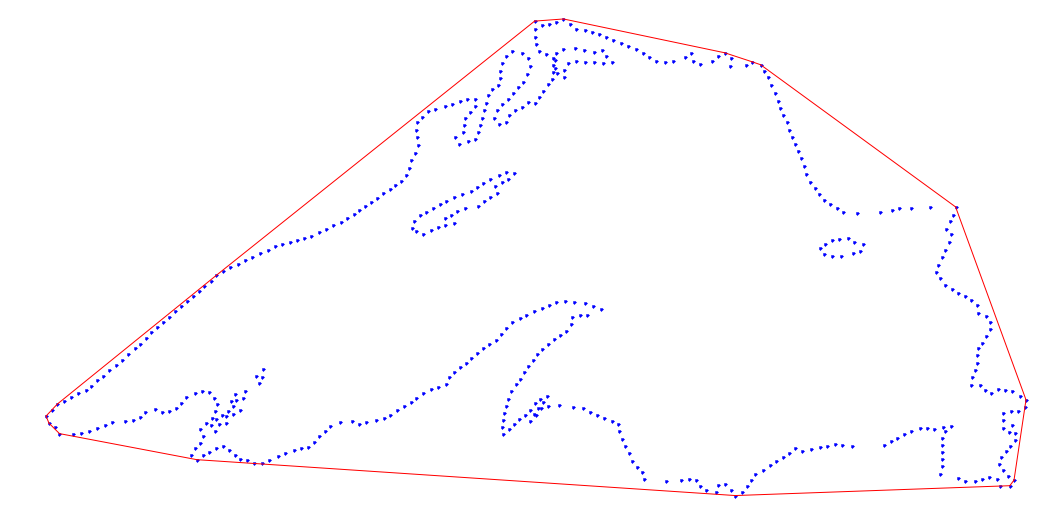

In [80]:
plt.figure(figsize=(18, 18))
plt.xlim(vertices_ls[:,0].min()-0.01, vertices_ls[:,0].max()+0.01)
plt.ylim(vertices_ls[:,1].min()-0.01, vertices_ls[:,1].max()+0.01)
plt.axis('off')
plt.axes().set_aspect('equal')
plt.plot(vertices_ls[:,0], vertices_ls[:,1], 'b.')
for simplex in hull.simplices:
    plt.plot(vertices_ls[simplex, 0], vertices_ls[simplex, 1], 'r-')
    
plt.show()

Let us now illustrate a few advanced uses of `ConvexHull`.  First, the computation of the convex hull of a random set of points in the 3D space.  For visualization, we will use the `mayavi` libraries.

In [ ]:
from mayavi import mlab

In [ ]:
points = np.random.rand(320, 3)

hull = ConvexHull(points)

X = hull.points[:, 0]
Y = hull.points[:, 1]
Z = hull.points[:, 2]

mlab.triangular_mesh(X, Y, X, hull.simplices, colormap='gray', 
                     opacity=0.5, representation='wireframe')

mlab.show()

<img src="https://farm4.staticflickr.com/3908/15144534059_c9ea33a896_d.jpg">

#### Voronoi Diagrams

Computing the Voronoi diagram of a set of vertices (our _seeds_) can be done with the routine `Voronoi` (and its companion `voronoi_plot_2d` for visualization) from the module `scipy.spatial`.  The routine `Voronoi` is in turn a wrapper to the function `qvoronoi`  from the `Qhull` libraries, with the following default `qvoronoi` controls: `qhull_option='Qbb Qc Qz Qx'` if the dimension of the points is greater than 4, and `qhull_options='Qbb Qc Qz'` otherwise.  For the computation of the **furthest-site Voronoi diagram**, instead of the nearest-site, we would use the extra control `Qu`.

In [60]:
from scipy.spatial import Voronoi, voronoi_plot_2d

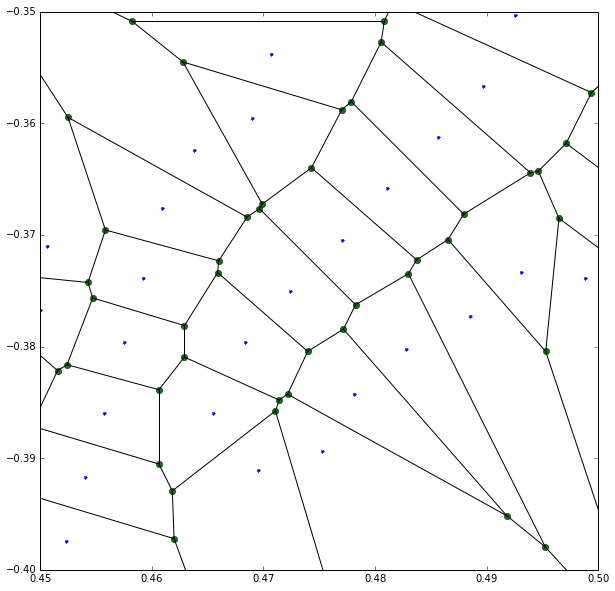

In [78]:
vor = Voronoi(vertices_ls)

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, aspect='equal')
voronoi_plot_2d(vor, ax=ax)
plt.xlim( 0.45,  0.50)
plt.ylim(-0.40, -0.35)
plt.show()

* The small dots are the original seeds with `x`-coordinates between `0.45` and `0.50`, and `y`-coordinates between `-0.40` and `-0.35`.  We access those values either from the original list `vertices_ls`, or from `vor.points`. 
* The plane gets partitioned into different regions (the Voronoi cells), one for each seed.  These regions contain all points in the plane which are closest to its seed.  Each region receives an index, which is not necessarily the same index as the index of its seed in the `vor.points` list.  To access the corresponding region to a given seed, we use `vor.point_region`.  

In [62]:
vor.point_region

array([  0,  22,  24,  21,  92,  89,  91,  98,  97,  26, 218, 219, 220,
       217, 336, 224, 334, 332, 335, 324, 226, 231, 230, 453, 500, 454,
       235, 234, 333, 236, 341, 340,  93, 343, 339, 342, 237, 327, 412,
       413, 344, 337, 338, 138,  67, 272, 408, 404, 403, 407, 406, 405,
       268, 269, 270, 257, 271, 258, 259,   2, 260, 261, 263,  15,  70,
        72, 278, 275, 277, 276, 179, 273, 274, 204, 289, 285, 288, 318,
       317, 216, 215, 312, 313, 309, 310, 243, 151, 150, 364, 365, 244,
       433, 362, 360, 363, 361, 242, 308, 307, 314, 311, 316, 315, 319,
       284, 287, 286, 452, 451, 450, 482, 483, 409, 493, 486, 485, 484,
       510, 516, 517, 410, 494, 518, 512, 515, 511, 513, 514, 508, 509,
       487, 214, 488, 489, 432, 429, 431, 430, 359, 490, 491, 492, 144,
       146, 147, 145, 149, 148, 143, 140, 142, 139, 141, 463, 428, 357,
       427, 462, 459, 461, 460, 426, 240, 239, 241, 352, 356, 355, 421,
       423, 424, 420, 422,  46,  47,  48, 112,  33,  32,  31, 11

* Each Voronoi cell is defined by its delimiting vertices and edges (also known as _ridges_ in Voronoi jargon).  The list with the coordinates of the computed vertices of the Voronoi diagram can be obtained with `vor.vertices`.  These vertices were represented as bigger dots in the previous image, and are easily identifiable because they are always at the intersection of at least two edges --- while the seeds have no incoming edges.

In [63]:
vor.vertices

array([[ 0.88382749, -0.23508215],
       [ 0.10607886, -0.63051169],
       [ 0.03091439, -0.55536174],
       ..., 
       [ 0.49834202, -0.62265786],
       [ 0.50247159, -0.61971784],
       [ 0.5028735 , -0.62003065]])

* For each of the regions, we can access the set of delimiting vertices with `vor.regions`.  For instance, to obtain the coordinates of the vertices that delimit the region around the 4th seed, we could issue

In [64]:
[vor.vertices[x] for x in vor.regions[vor.point_region[4]]]

[array([ 0.13930793, -0.81205929]),
 array([ 0.11638   , -0.92111088]),
 array([ 0.11638   , -0.63657789]),
 array([ 0.11862537, -0.6303235 ]),
 array([ 0.12364332, -0.62893576]),
 array([ 0.12405738, -0.62891987])]

Care must be taken with the previous step: Some of the vertices of the Voronoi cells are not actual vertices, but lie _at infinity_.  When this is the case, they are identified with the index `-1`.  In this situation, to provide an accurate representation of a ridge of these characteristics we must use the knowledge of the two seeds whose contiguous Voronoi cells intersect on said ridge---since the ridge is perpendicular to the segment defined by those two seeds.  We obtain the information about those seeds with `vor.ridge_points`

In [65]:
vor.ridge_points

array([[  0,   1],
       [  0, 433],
       [  0, 434],
       ..., 
       [124, 118],
       [118, 119],
       [119, 122]], dtype=int32)

The first entry of `vor.ridge_points` can be read as follows: There is a ridge perpendicular to both the first and second seeds. 

There are other attributes of the object `vor` that we may use to inquire properties of the Voronoi diagram, but the ones we have described should be enough to replicate the previous image.  We leave this as a nice exercise:  

1. Gather the indices of the seeds from `vor.points` that have their `x`- and `y`-coordinates in the required window.  Plot them.
2. For each of those seeds, gather information about vertices of their corresponding Voronoi cells.  Plot those vertices not at the infity with a different style as the seeds.
3. Gather information about the ridges of each relevant region, and plot them as simple thin segments.  Some of the ridges cannot be represented by their two vertices.  In that case, we use the information about the seeds that determine them.

#### Triangulations

A **triangulation** of a set of vertices in the plane is a division of the convex hull of the vertices into triangles, satisfying one important condition.  Any two given triangles:

* must be disjoint, or
* must intersect only at one common vertex, or
* must share one common edge.

These plain triangulations have not much computational value, since some of its triangles might be too skinny --- this leads to uncomfortable rounding errors, or computation or erroneous areas, centers, etc.  Among all possible triangulations, we always seek one where the properties of the triangles are somehow balanced.

With this purpose in mind, we have the **Delaunay triangulation** of a set of vertices.  This triangulation satisfies an extra condition: None of the vertices lies in the interior of the circumcircle of any triangle.  We refer to triangles with this property as **Delaunay triangles**.

For this simpler setting, in the module `scipy.spatial`, we have the routine `Delaunay`, which is in turn a wrapper to the function `qdelaunay` from the `Qhull` libraries, with the `qdelaunay` controls set exactly as for the Voronoi diagram computations.

In [135]:
from scipy.spatial import Delaunay, delaunay_plot_2d

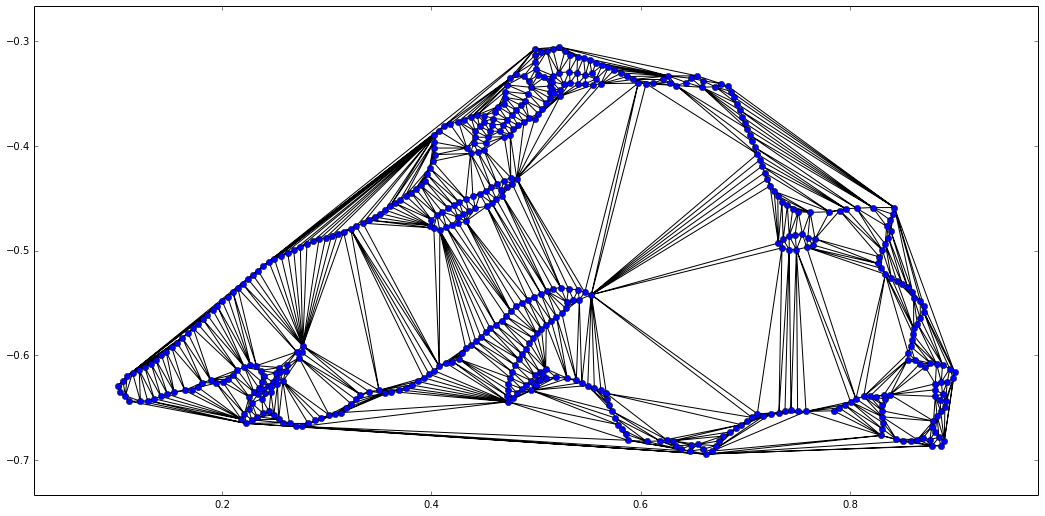

In [138]:
tri = Delaunay(vertices_ls)

plt.figure(figsize=(18, 18))
ax = plt.subplot(111, aspect='equal')
delaunay_plot_2d(tri, ax=ax)
plt.show()

It is possible to generate triangulations with imposed edges too.  Given a collection of vertices and edges, a **constrained Delaunay triangulation** is a division of the space into triangles with those prescribed features.  The triangles in this triangulation are not necessarily Delaunay.

We can accomplish this extra condition sometimes by subdivision of each of the imposed edges.  We call this triangulation **conforming Delaunay**, and the new (artificial) vertices needed to subdivide the edges are called **Steiner points**.

A **constrained conforming Delaunay triangulation** of an imposed set of vertices and edges satisfies a few more conditions, usually setting thresholds on the values of angles or areas of the triangles.  This is achieved by introducing a new set of **Steiner points**, which are allowed anywhere, not only on edges.


To achieve these high-level triangulations, we need to step outside of the `scipy` stack.  We have a `python` wrapper to the amazing implementation of mesh generators [www.cs.cmu.edu/~quake/triangle.html](www.cs.cmu.edu/~quake/triangle.html) by Richard Shewchuck .  This wrapper, together with examples and other related functions, can be installed by issuing

In [ ]:
!pip install triangle

For more information on this module, refer to the documentation online from its author, Dzhelil Rufat, at [dzhelil.info/triangle/index.html](dzhelil.info/triangle/index.html)

Let us compute those different triangulations for our running example.  We use once again the `poly` file with the features of Lake Superior, which we read into a dictionary with all the information about vertices, segments and holes. 	The first example is that of the constrained Delaunay triangulation (`cndt`).  We accomplish this task with the flag `p` (indicating that the source is a _planar straight line graph_, rather than a set of vertices).

In [69]:
from triangle import triangulate, plot as tplot

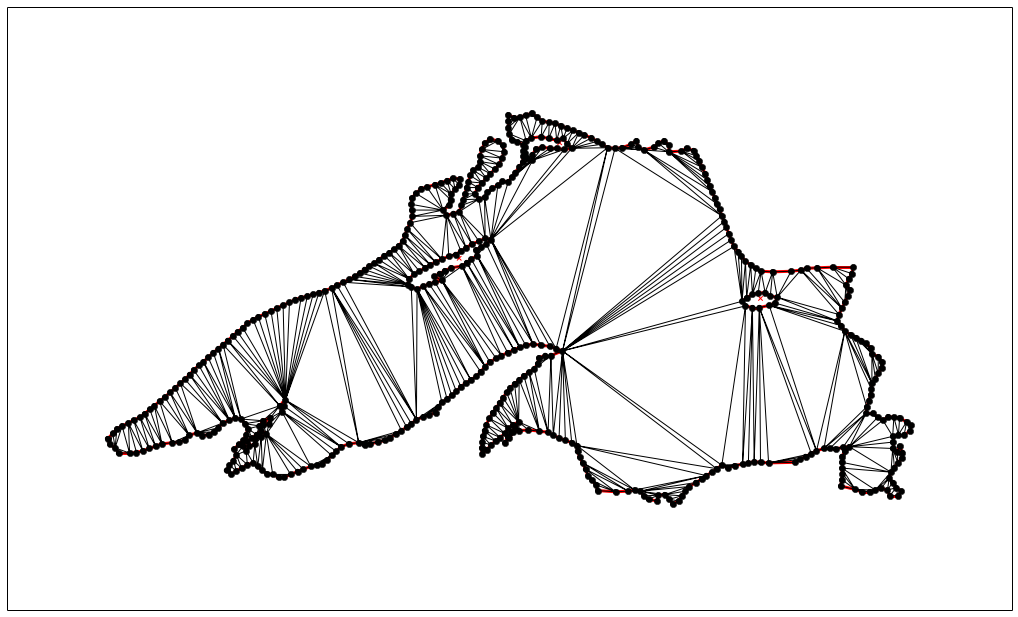

In [76]:
cndt = triangulate(lake_superior, 'p')

plt.figure(figsize=(18, 18))
ax = plt.subplot(111, aspect='equal')
tplot.plot(ax, **cndt)
plt.show()

The next step is the computation of a conforming Delaunay triangulation (`cfdt`).  We enforce Steiner points on some segments to ensure as many Delaunay triangles as possible.  We achieve this with extra flag `D`.


In [71]:
cfdt = triangulate(lake_superior, 'pD')

But slight or no improvements with respect to the previous diagram can be observed in this case.  The real improvement arises when we further impose constraints in the values of minimum angles on triangles (with the flag `q`), or in the maximum values of the areas of triangles (with the flag 'a').  For instance, if we require a constrained conforming Delaunay triangulation (`cncfdt`) in which all triangles have a minimum angle of at least 20 degrees, we issue the following command

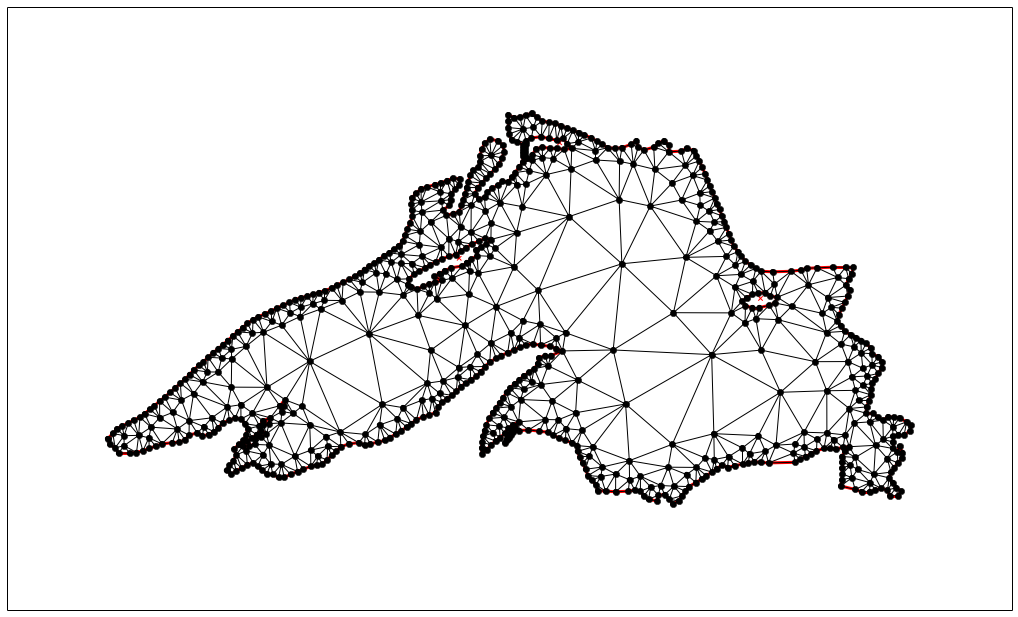

In [75]:
cncfq20dt = triangulate(lake_superior, 'pq20D')

plt.figure(figsize=(18,18))
ax = plt.subplot(111, aspect='equal')
tplot.plot(ax, **cncfq20dt)
plt.show()

For the last example to conclude this section, we further impose a maximum area on triangles.  


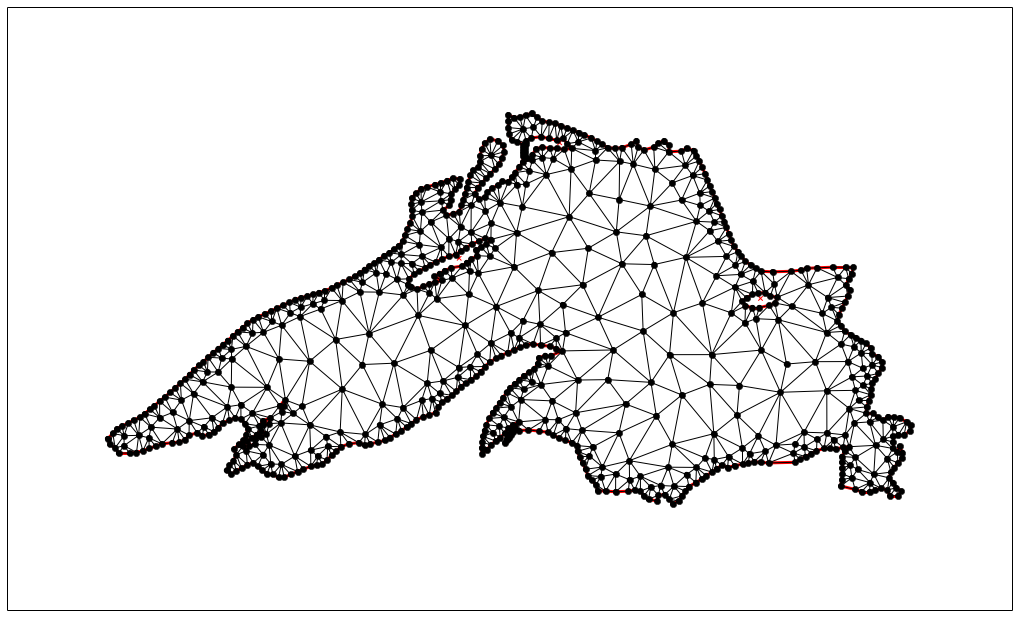

In [82]:
cncfq20adt = triangulate(lake_superior, 'pq20a.001D')

plt.figure(figsize=(18, 18))
ax = plt.subplot(111, aspect='equal')
tplot.plot(ax, **cncfq20adt)
plt.show()

#### Shortest Paths

We will use the last example to introduce a special setting of the problem of shortest paths.  We pick a location in the North-West coast of the lake (say, the vertex indexed as `370` in the original `poly` file), and the goal is to compute the shortest path to the furthest South-East location on the shore, at the bottom-right corner---this is the vertex indexed as `179` in the original `poly` file.   By a _path_ in this setting, we mean a chain of edges of the triangulation.

In the `scipy` stack we accomplish the computation of shortest paths on a triangulation (and in some other similar geometries that can be coded by means of graphs) by relying on two modules:

* `scipy.sparse` to store a weighted-adjacency matrix `G` representing the triangulation.  Each non-zero entry `G[i,j]` of this adjacency matrix is precisely the length of the edge from vertex `i` to vertex `j`.
* `scipy.sparse.csgraph`, the module that deals with *compressed sparse graphs*.  This module contains routines to analyze, extract information or manipulate graphs.  Among these routines, we have several different algorithms to compute shortest paths on a graph.

> For more information on the module `scipy.sparse.csgraph`, refer to the online documentation:

>    [docs.scipy.org/doc/scipy/reference/sparse.csgraph.html](docs.scipy.org/doc/scipy/reference/sparse.csgraph.html)

> For the theory and applications of Graph Theory, one of the best sources is the introductory book by Reinhard Diestel, _Graph Theory_, published by Springer-Verlag.

Let us illustrate this example with proper code.  We start by collecting the indices of the vertices of all segments in the triangulation, and the lengths of these segments.

In [83]:
from scipy.spatial import minkowski_distance

In [84]:
X = cncfq20adt['triangles'][:,0]
Y = cncfq20adt['triangles'][:,1]
Z = cncfq20adt['triangles'][:,2]

Xvert = [cncfq20adt['vertices'][x] for x in X]
Yvert = [cncfq20adt['vertices'][y] for y in Y]
Zvert = [cncfq20adt['vertices'][z] for z in Z]

lengthsXY = minkowski_distance(Xvert, Yvert)
lengthsXZ = minkowski_distance(Xvert, Zvert)
lengthsYZ = minkowski_distance(Yvert, Zvert)

We now create the weighted-adjacency matrix, which we store as a row-based linked-list sparse matrix (easily coded with `lil_matrix` from the library `scipy.sparse`), and compute the shortest path between the requested vertices.  We gather in a list all the vertices included in the computed path, and plot the resulting chain overlaid on the triangulation.


In [85]:
from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import shortest_path

In [86]:
nvert = len(cncfq20adt['vertices'])
G = lil_matrix((nvert, nvert))

In [87]:
for k in range(len(X)):
    G[X[k], Y[k]] = G[Y[k], X[k]] = lengthsXY[k]
    G[X[k], Z[k]] = G[Z[k], X[k]] = lengthsXZ[k]
    G[Y[k], Z[k]] = G[Z[k], Y[k]] = lengthsYZ[k]

In [88]:
dist_matrix, pred = shortest_path(G, return_predecessors=True, directed=True, unweighted=False)

In [93]:
index = 370
path = [370]

while index != 197:
    index = pred[197, index]
    path.append(index)
    
Xs = [cncfq20adt['vertices'][x][0] for x in path]
Ys = [cncfq20adt['vertices'][x][1] for x in path]

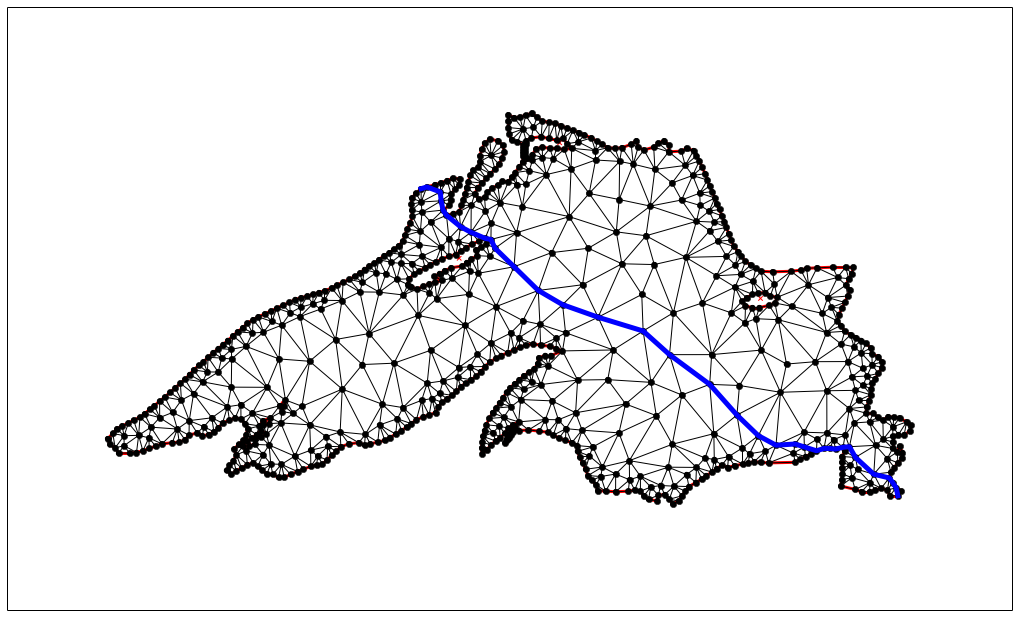

In [95]:
plt.figure(figsize=(18,18))
ax = plt.subplot(111, aspect='equal')
tplot.plot(ax, **cncfq20adt)
ax.plot(Xs, Ys, '-', linewidth=5, color='blue'); \
plt.show()

### Geometric Query Problems

The fundamental problems in this category are the following:

* Point Location.  
* Nearest neighbor.
* Range searching.

#### Point Location

The problem of _point location_ is fundamental in Computational Geometry—given a partition of the space into disjoint regions, we need to query the region that contains a target location.   

The most basic point location problems are those where the partition is given by a single geometric object: a circle, or a polygon, for example. For those simple objects that have been constructed through any of the classes in the module `sympy.geometry`, we have two useful methods: `.encloses_point` and `.encloses`.

The former checks whether a point is interior to a source object (but not on the border), while the latter checks whether another target object has all its defining entities in the interior of the source object.

In [98]:
P1 = Point(0, 0)
P2 = Point(1, 0)
P3 = Point(-1, 0)
P4 = Point(0, 1)

C = Circle(P2, P3, P4)
T = Triangle(P1, P2, P3)

In [100]:
C.encloses_point(P1)

True

In [101]:
C.encloses(T)

False

Of special importance is this simple setting where the source object is a polygon.  The routines in the `sympy.geometry` module get the job done, but at the cost of too many resources and time.  A much faster way to approach this problem is by using the `Path` class from the libraries of `matplotlib.path`.  Let us see how with a quick session: first, we create a representation of a polygon as a `Path`.

In [102]:
from matplotlib.path import Path

In [106]:
my_polygon = Path([hull.points[x] for x in hull.vertices])

We may ask now whether a point (respectively, a sequence of points) is interior to the polygon.  We accomplish this with either attribute `contains_point` or `contains_points`.

In [107]:
X = .25 * np.random.randn(100) + .5
Y = .25 * np.random.randn(100) - .5

In [109]:
my_polygon.contains_points([[X[k], Y[k]] for k in range(len(X))])

array([False, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,  True], dtype=bool)

More challenging point location problem arise when our space is partitioned by a complex structure.  For instance, once a triangulation has been computed, and a random location is considered, we need to query for the triangle where our target location lies.  In the module `scipy.spatial` we have handy routines to perform this task over Delaunay triangulations created with `scipy.spatial.Delaunay`.  

In the following example, we track the triangles that contain a set of 100 random points in the domain.  

In [110]:
from scipy.spatial import tsearch

In [113]:
tri = Delaunay(vertices_ls)

points = zip(X, Y)

tsearch(tri, points)

array([ -1,  -1,  -1,  -1, 581,  -1,  -1, 144, 647,  32,  -1,  -1,  -1,
        -1, 596,  -1,  -1,  -1, 860,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  71,  -1,  38,  -1,  -1, 454,  -1,  -1,
        -1, 296,  11,  -1,  -1,  -1,  -1, 531, 647,  -1,  -1, 690,  -1,
        -1,  11,  -1, 687, 162,  -1,  -1, 990,  -1, 429,  -1,  -1, 165,
        -1,  -1,  -1,  -1,  -1, 161,  -1,  11,  -1, 108,  -1, 867,  -1,
        -1,  -1, 795,  -1,  -1,  -1, 108,  -1, 114,  -1,  -1, 265, 684,
        -1,  -1,  -1,  -1,  -1, 850, 244, 108, 252], dtype=int32)

The same result is obtained with the method `.find_simplex` of the `Delaunay` object `tri`.

In [114]:
tri.find_simplex(points)

array([ -1,  -1,  -1,  -1, 581,  -1,  -1, 144, 647,  32,  -1,  -1,  -1,
        -1, 596,  -1,  -1,  -1, 860,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  71,  -1,  38,  -1,  -1, 454,  -1,  -1,
        -1, 296,  11,  -1,  -1,  -1,  -1, 531, 647,  -1,  -1, 690,  -1,
        -1,  11,  -1, 687, 162,  -1,  -1, 990,  -1, 429,  -1,  -1, 165,
        -1,  -1,  -1,  -1,  -1, 161,  -1,  11,  -1, 108,  -1, 867,  -1,
        -1,  -1, 795,  -1,  -1,  -1, 108,  -1, 114,  -1,  -1, 265, 684,
        -1,  -1,  -1,  -1,  -1, 850, 244, 108, 252], dtype=int32)

> Note that, when a triangle is found, the routine reports its corresponding index in `tri.simplices`.  If no triangle is found (which means the point is exterior to the convex hull of the triangulation), the index reported is `-1`.

#### Nearest Neighbors

The problem of finding the Voronoi cell that contains a given location is equivalent to the search for the _nearest neighbor_ in a set of seeds.  We can always perform this search with a brute force algorithm --- and this is acceptable in some cases --- but in general, there are more elegant and less complex approaches to this problem.   The key lies in the concept of **k-d trees**: a special case of binary space partitioning structures for organizing points, conductive to fast searches.

In the `scipy` stack we have an implementation of k-d trees, the `python` class `KDTree`, in the module `scipy.spatial`.  This implementation is based on ideas published in 1999 by Maneewongvatana and Mount.  It is initialized with the location of our input points.  Once created, it can be manipulated and queried with the following methods and attributes:

* Methods:

    * `data`: it presents the input
    * `leafsize`: the number of points at which the algorithm switches to brute-force.  This value can be optionally offered in the initialization of the `KDTree` object.
    * `m`: The dimension of the space where the points are located.
    * `n`: The number of input points.
    * `maxes`: It indicates the highest values of each of the coordinates of the input points.
    * `mins`: It indicates the lowest values of each of the coordinates of the input points.

* Attributes:

    * `query(self, Q, p=2.0)`: The attribute that searches for the nearest-neighbor or a target location `Q`, using the structure of the k-d tree, with respect to the Minkowski `p`-distance.
    * `query_ball_point(self, Q, r, p=2.0)`: A more sophisticated query that outputs all points within Minkowski `p`-distance `r` from a target location `Q`
    * `query_pairs(self, r, p=2.0)`:  Find all pairs of points whose Minkowski `p`-distance is at most `r`.
    * `query_ball_tree(self, other, r, p=2.0)`: similar to `query_pairs`, but this attribute finds all pairs of points from two different k-d trees, which are at a Minkowski `p`-distance of at least `r`.
    * `sparse_distance_matrix(self, other, max_distance)`: Computes a distance matrix between two k-d trees, leaving as zero any distance greater than `max_distance`.  The output is stored in a sparse `dok_matrix`.
    * `count_neighbors(self, other, r, p=2.0)`: This attribute is an implementation of the *Two-point correlation* designed by Gray and Moore, to count the number of pairs of points from two different kd-trees, which are at a Minkowski `p`-distance not larger than `r`.  Unlike `query_ball`, this attribute does not produce the actual pairs.

There is a faster implementation of this object created as an extension type in `cyton`, the `cdef` class `cKDTree`.  The main difference is in the way the nodes are coded on each case: 

* For `KDTree`, the nodes are nested `python` classes (`node` being the top class, and `leafnode`, `innernode` being subclasses that represent different kinds of nodes in the tree).  
* For `cKDTree`, the nodes are `C`-type malloc'd structs, not classes.  This makes the implementation much faster, at a price of less control over a possible manipulation of the nodes.

Let use this idea to solve a point location problem, and at the same time revisit the Voronoi diagram from Lake Superior.

In [115]:
from scipy.spatial import cKDTree

In [116]:
vor  = Voronoi(vertices_ls)
tree = cKDTree(vertices_ls)

First, we query for the previous dataset of 100 random locations, the seeds that are closer to each of them


In [117]:
tree.query(points)

(array([ 0.03189865,  0.05485824,  0.03039556,  0.01451614,  0.00823932,
         0.12505693,  0.12513442,  0.03509376,  0.04590392,  0.02318914,
         0.07150942,  0.17507159,  0.32000303,  0.28103277,  0.00387307,
         0.20218023,  0.56931783,  0.2438814 ,  0.00497646,  0.19877839,
         0.07929127,  0.04120877,  0.38895658,  0.06424858,  0.14888663,
         0.16794314,  0.35340306,  0.16875195,  0.17525878,  0.14171879,
         0.03664949,  0.02785777,  0.13371831,  0.00344589,  0.24433616,
         0.03495914,  0.05096901,  0.18228558,  0.12835507,  0.10430278,
         0.01836277,  0.03195599,  0.25410813,  0.08649537,  0.12413418,
         0.15121574,  0.01512203,  0.03043086,  0.05536709,  0.12452836,
         0.00305407,  0.09501704,  0.14421729,  0.03263339,  0.18097013,
         0.02150684,  0.08843428,  0.14651107,  0.36373736,  0.02840998,
         0.25367564,  0.00911774,  0.1604499 ,  0.11808091,  0.03245401,
         0.0742091 ,  0.60190521,  0.27102385,  0.1

Note the output is a tuple with two `numpy.array`: the first one indicates the distances the each point closest seed (their nearest-neighbors), and the second one indicates the index of the corresponding seed.  

We may use this idea to represent the Voronoi diagram without a geometric description in terms of vertices, segments and rays.

In [118]:
X = np.linspace( 0.45,  0.50, 256)
Y = np.linspace(-0.40, -0.35, 256)
canvas = np.meshgrid(X, Y)
points = np.c_[canvas[0].ravel(), canvas[1].ravel()]
queries = tree.query(points)[1].reshape(256, 256)

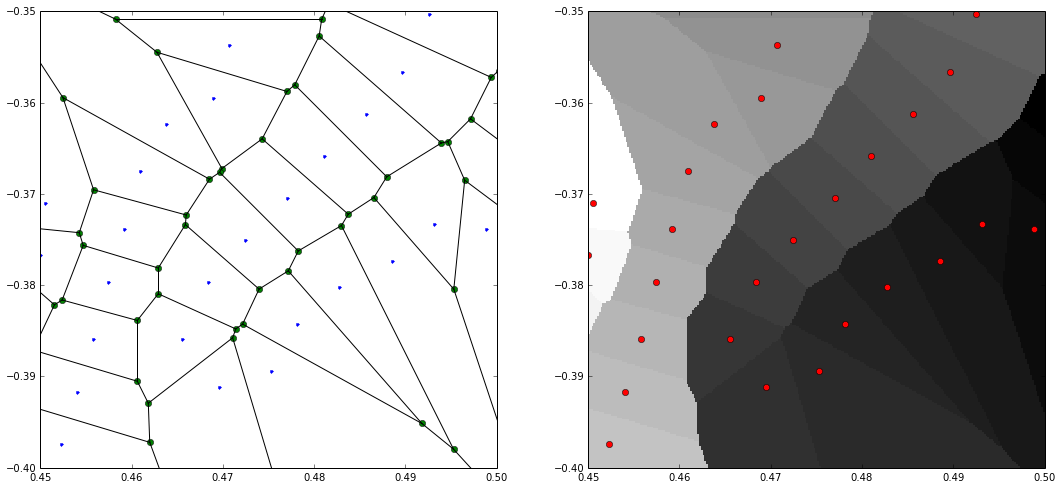

In [121]:
plt.figure(figsize=(18, 18))

ax1 = plt.subplot(121, aspect='equal')
voronoi_plot_2d(vor, ax=ax1)
plt.xlim( 0.45,  0.50)
plt.ylim(-0.40, -0.35)

ax2 = plt.subplot(122, aspect='equal')
plt.gray()
plt.pcolor(X, Y, queries)
plt.plot(vor.points[:,0], vor.points[:,1], 'ro')
plt.xlim( 0.45,  0.50)
plt.ylim(-0.40, -0.35)
plt.show()

#### Range Searching

A _range searching problem_ tries to determine which objects of an input set intersect with a query object (that we call the **range**). 

For example, given a set of points in the plane, which ones are contained inside a circle of radius `r` centered at a target location `Q`. We can solve this sample problem easily with the attribute `query_ball_point` from a suitable implementation of a k-d tree.  We can go even further: if the range is an object formed by the intersection of a sequence of different balls, the same attribute gets the job done, as the following code illustrates.


set([0, 65, 267, 70, 200, 203, 140, 272, 17, 158, 95, 237, 176, 180, 246, 183, 250])


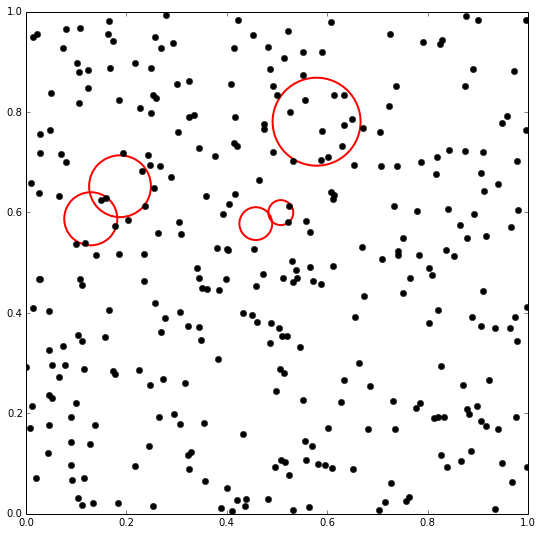

In [133]:
points = np.random.rand(320, 2)
range_points = np.random.rand(5, 2)
range_radii = 0.1 * np.random.rand(5)

tree = cKDTree(points)
result = set()

for k in range(5):
    point  = range_points[k]
    radius = range_radii[k]
    partial_query = tree.query_ball_point(point, radius)
    result = result.union(set(partial_query))
    
print result
    
fig = plt.figure(figsize=(9, 9))
plt.axes().set_aspect('equal')
for point in points:
    plt.plot(point[0], point[1], 'ko')
    
for k in range(5):
    point = range_points[k]
    radius = range_radii[k]
    circle = plt.Circle(point, radius, fill=False, color="red", lw=2)
    fig.gca().add_artist(circle)
    
plt.show()

This gives the following diagram, where the small dots represent the locations of the search space, and the circles are the range.  The query is, of course, the 14 points located inside of the circles, that our algorithm computed.

Problems in this setting vary from trivial to extremely complicated, depending on the input object types, range types, and query types.  An excellent exposition of this subject is the survey paper _Geometric Range Searching and its Relatives_, published by Pankaj K. Agarwal and Jeff Erickson in 1999, by the American Mathematical Society Press, as part of the _Advances in Discrete and Computational Geometry: proceedings of the 1996 AMS-IMS-SIAM joint summer research conference, Discrete and Computational Geometry_.

### Dynamic Problems

A dynamic problem is regarded as any of the problems in the previous two settings (static or query), but with the added challenge that objects are constantly being inserted or deleted.  Besides solving the base problem, we need to take extra measures to assure that the implementation is efficient with respect to these changes.

To this effect, the implementations wrapped from the `Qhull` libraries in the module `scipy.spatial` are equiped to deal with insertion of new points.   We accomplish this by stating the option `incremental=True`, which basically suppresses the `qhull` control `'Qz'`, and prepares the output structure for these complex situations.  

Let us illustrate with a simple example.  We start with the first ten vertices of Lake Superior, and inserting ten vertices at a time, update the corresponding triangulation and Voronoi diagrams.

In [175]:
small_superior = lake_superior['vertices'][:9]

tri = Delaunay(small_superior, incremental=True)
vor = Voronoi(small_superior, incremental=True)

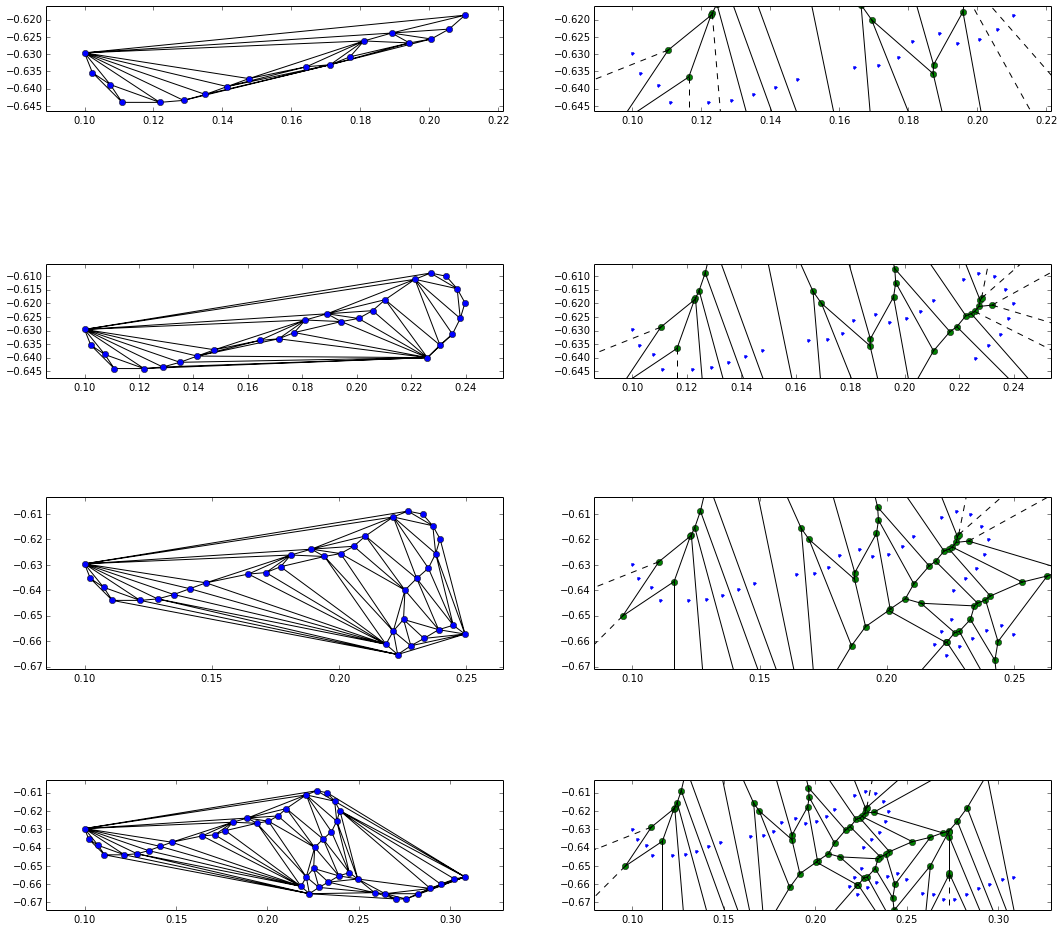

In [176]:
plt.figure(figsize=(18,18))

for k in range(4):
    tri.add_points(vertices_ls[10*(k+1):10*(k+2)-1])
    vor.add_points(vertices_ls[10*(k+1):10*(k+2)-1])
    ax1 = plt.subplot(4, 2, 2*k+1, aspect='equal')
    ax1.set_xlim( 0.00,  1.00)
    ax1.set_ylim(-0.70, -0.30)
    delaunay_plot_2d(tri, ax1)
    ax2 = plt.subplot(4, 2, 2*k+2, aspect='equal')
    ax2.set_xlim(0.0, 1.0)
    ax2.set_ylim(-0.70, -0.30)
    voronoi_plot_2d(vor, ax2)
    
plt.show()

## Numerical Computational Geometry

This field arose simultaneously among different groups of researchers seeking solutions to a priori non-related problems.  As it turns out, all the solutions they posed did actually have an important common denominator: they were obtained upon representing objects by means of parametric curves, parametric surfaces, or regions bounded by those.   These scientists ended up unifying their techniques over the years, to finally define the field of Numerical Computational Geometry.  In this journey, the field received different names: **Machine Geometry**, **Geometric Modeling**, and the most widespread **Computer Aided Geometric Design** (**CAGD**).

It is used in computer vision, for example, for 3D reconstruction and movement outline.   It is widely employed for the design and qualitative analysis of  the bodies of automobiles, aircraft, or watercraft.  There are many computer aided design software packages (*CAD*) that facilitate interactive manipulation and solution of many of the problems in this area.  In this regard, any interaction with `python` gets relegated to being part of the underlying computational engine behind the visualization or animation—which are none of the strengths of `scipy`.  For this reason, we will not cover visualization or animation applications in this book, and focus on the basic mathematics instead.

In that regard, the foundation of Numerical Computational Geometry is based on three key concepts: Bézier surfaces, Coons patches, and B-spline methods.   In turn, the theory of Bézier curves plays a central role in the development of these concepts.  They are the geometric standard for the representation of piecewise polynomial curves.  In this section we focus solely on the basic development of the theory of plane Bézier curves.

> The rest of the material is also beyond the scope of `scipy`, and we therefore leave its exposition to more technical books.  The best source in that sense is, without a doubt, the book _Curves and Surfaces for Computer Aided Geometric Design—A Practical Guide_ (5th ed.), by Gerald Farin, published by Academic Press under the Morgan Kauffman Series in Computer Graphics and Geometric Modeling. 

### Bézier Curves

It all starts with the **de Casteljau Algorithm** to construct parametric equations of an arc of a polynomial of order 3.  In the submodule `matplotlib.path`  we have an implementation of this algorithm using the class `Path`, which we can use to generate our own user-defined routines to generate and plot plane Bézier curves.


> For information about the class `Path` and its usage within the `matplotlib` libraries, refer to the official documentation at [matplotlib.org/api/path_api.html#matplotlib.path.Path](matplotlib.org/api/path_api.html#matplotlib.path.Path), as well as a very instructive tutorial at [matplotlib.org/users/path_tutorial.html](matplotlib.org/users/path_tutorial.html).  In this section, we focus solely on the necessary material to deal with Bézier curves.

Before we proceed, we need some basic code to represent and visualize Bézier curves:

* The de Casteljau algorithm for arcs of polynomials of order 2 is performed by creating a `Path` with the three control points as vertices, and the list `[Path.MOVETO, Path.CURVE3, Path.CURVE3]` as code.  This ensures that the resulting curve starts at `P1` in the direction given by the segment `P1P2`, and ends at `P3` with direction given by the segment `P2P3`.  If the three points are collinear, we obtain a segment containing them all.  Otherwise, we obtain an arc of parabola.

* The de Casteljau algorithm for arcs of polynomials of order 3 is performed in a similar way to the previous case.  We have four control points, and we create a `Path` with those as vertices.  The code is the list `[Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]`, which ensures that the arc starts at `P1` with direction given by the segment `P1P2`.  It also ensures that the arc ends at `P4` in the direction of the segment `P3P4`.  

In [180]:
import matplotlib.patches as patches

def bezier_parabola(P1, P2, P3):
   return Path([P1, P2, P3],
               [Path.MOVETO, Path.CURVE3, Path.CURVE3])

def bezier_cubic(P1, P2, P3, P4):
    return Path([P1, P2, P3, P4],
                [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4])

def plot_path(path, labels=None):
    Xs, Ys = zip(*path.vertices)
    fig = plt.figure()
    ax  = fig.add_subplot(111, aspect='equal')
    ax.set_xlim(min(Xs)-0.2, max(Xs)+0.2)
    ax.set_ylim(min(Ys)-0.2, max(Ys)+0.2)
    patch = patches.PathPatch(path, facecolor='none', linewidth=2)
    ax.add_patch(patch)
    ax.plot(Xs, Ys, 'o--', color='blue', linewidth=1)
    if labels:
        for k in range(len(labels)):
            ax.text(path.vertices[k][0]-0.1,
                path.vertices[k][1]-0.1, 
                labels[k])
    plt.show()

Let us test it with a few basic examples:

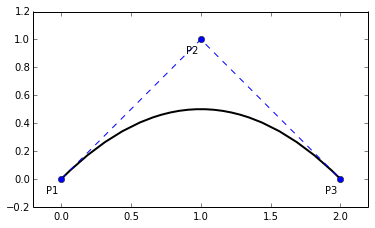

In [181]:
P1 = (0.0, 0.0)
P2 = (1.0, 1.0)
P3 = (2.0, 0.0)
path_1 = bezier_parabola(P1, P2, P3)
plot_path(path_1, labels=['P1', 'P2', 'P3'])

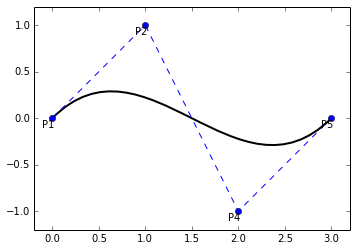

In [182]:
P4 = (2.0, -1.0)
P5 = (3.0, 0.0)
path_2 = bezier_cubic(P1, P2, P4, P5)
plot_path(path_2, labels=['P1', 'P2', 'P4', 'P5'])

Higher degree curves are computationally expensive to evaluate.  When complex paths are needed, we rather create them as a piecewise sequence of low order Bézier patched together---we call this object a *Bézier spline*.   Notice it is not hard to guarantee continuity on these splines.  It is enough to make the end of each path the starting point of the next one.  It is also easy to guarantee smoothness (at least up to the first derivative), by making the last two control points of one curve be aligned with the first two control points of the next one.  Let us illustrate this with an example.

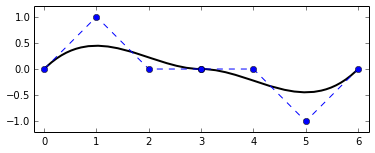

In [183]:
Q1 = P5
Q2 = (4.0, 0.0)
Q3 = (5.0, -1.0)
Q4 = (6.0, 0.0)
path_3 = bezier_cubic(P1, P2, P3, P5)
path_4 = bezier_cubic(Q1, Q2, Q3, Q4)
plot_path(Path.make_compound_path(path_3, path_4))

A clear advantage of representing curves as Bézier splines arises when we need to apply an affine transformation to a curve.  For instance, if we required a counter-clockwise rotated version of the last curve computed, instead of performing the operation over all points of the curve, we simply apply the transformation to the control points, and repeat the de Casteljau algorithm on the new controls.

In [184]:
def rotation(point, angle):
    return (np.cos(angle)*point[0] - np.sin(angle)*point[1], 
            np.sin(angle)*point[0] + np.cos(angle)*point[1])

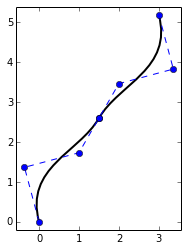

In [185]:
new_Ps = [rotation(P, np.pi/3) for P in path_3.vertices]
new_Qs = [rotation(Q, np.pi/3) for Q in path_4.vertices]
path_5 = bezier_cubic(*new_Ps)
path_6 = bezier_cubic(*new_Qs)
plot_path(Path.make_compound_path(path_5, path_6))

## Summary

we have developed a brief incursion in the field of Computational Geometry, and we have mastered all the tools coded in the `scipy` stack to effectively address the most common problems in this topic.